# Assignment 1 - Recursion Algorithms

In [1]:
import random
from time import perf_counter_ns as pns
from average_runtime import calculate_average
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import pyplot
import numpy as np
from numpy import arange
from numpy import log

## Question 1 - Recursion

### Psuedocode for Recursion

Recursive (non-tail) Pseudocode:
* Define a function for factorial that takes an interger number
    * if number is equal to 1 then
        * return 1
    * else
        * return multiply number by calling the function(number - 1)

Recursive (tail) Pseudocode:
* Define a function for factorial that takes a number and an accumulator
    * if number is equal to 1 then
        * return accumulator
    * else
        * return by calling function(number - 1, number * accumulator)

Iteration Pseudocode:
* Define a function for factorial that takes an interger number
* let factorial equal to 1
* enter a for loop while integer _i_ is less than or equal to number
    * apply product assignment: let factorial = factorial *  _i_ 
* return factorial

### Algorithm for Recursion
<br>

<img style="float: left;" src="rec_non_tail.jpg">

<img style="float: left;" src="rec_tail.JPG">

<img style="float: left;" src="rec_iter.JPG">

### Python Code for Recursion

Function: Non-Tail Recursion 

In [2]:
def fact_nonT(number):
    if number == 1:
        return 1
    else:
        return number * fact_nonT(number - 1)

# to_fact = int(input("Enter a number to calculate the factorial: "))
# print("The factorial number of ", to_fact, "using non_tail recursion is: ", fact_nonT(to_fact))

Function: Tail Recursion

In [3]:
def fact_tail(number, accumulator):
    if number == 1:
        return accumulator
    else:
        return fact_tail(number - 1, number * accumulator)
    
# fact_1 = int(input("Two integers are needed to calculate the factorial: "))
# fact_2 = int(input("Enter the second integer: "))
# print("The numbers", fact_1, ",", fact_2, "has a factorial of:", fact_tail(fact_1, fact_2))

Function: Iterative 

In [4]:
def fact_iter(number):
    factorial = 1
    #for loop 
    for num in range(2, number + 1):
        #factorial = factorial * num
        factorial *= num
    return factorial

# fact_3 = int(input("Enter a number to calculate the factorial: "))
# print("The number", fact_3, "has a factorial of: ", fact_iter(fact_3))

### Findings:

**Running the functions:**
<br>
From the algorithm and code implemented, we see that the function called itself. For small values, the function will work. When using bigger values such as 3,000 however, an error occurred. The cell threw a maximum recursion depth exceeded error. In order to see the maximum number to calculate the recursion, sys.getrecursionlimit() was used. The maximum number was 3,000. In this assignment the maximum number used was 2,500. This was also the case for running the tail recursion function to find n!
<br><br>
For tail recursion, there is no stack frame as it calls itself at the end therefore no computation is done after the return of recursive call. 
<br><br>
Running the iterative factorial function uses a for loop and repeats the instructions within the for loop until a certain condition is met. In this case, it stopped when the loop reached the range specified. The difference is that the function does not call itself therefore it does not have a stack frame, instead it multiplies _factorial_ with the current number in the loop.

# Question 2 - Running Time for each Function

This section will run each type of recursion functions defined above. 
<br><br>
**Methodolody for this section (in order):**
<br>
* Make an array that will be used to run the factorial functions.
* Loop through each element of the array_1, call a function that will return an array of runtimes, calculate the average of this array and store it in a new list.
* Define a function that will take a value of array_1, initiate a loop that repeats 1000 times. In this loop: call a factorial function, calculate the runtime, store this runtime in a runtime list. Once the loop exits, the function returns this list. 
* A visualization of each factorial function runtime will be graphed. 

In [5]:
list_values = [10, 100, 500, 1000, 1500, 2000, 2500]

Function: Non-Tail Recursion 

In [17]:
def runtime_nontail(number):
    array_runtime = []
    for i in range(1000):
        start = pns()
        fact_nonT(number)
        end = pns()
        runtime = end - start
        array_runtime += [runtime]
    return array_runtime

In [18]:
#for loop to call runtime_nontail function.
average_values_nontail = []
for number in list_values:
    to_call = runtime_nontail(number)
    av = calculate_average(to_call)
    average_values_nontail += [av]

print(average_values_nontail)

[1366.0, 17177.0, 128441.5, 405223.8, 723223.8, 1222227.4, 1860660.5]


Function: Tail Recursion

In [19]:
def runtime_tail(number):
    array_runtime = []
    for i in range(1000):
        start = pns()
        fact_tail(number, 1)
        end = pns()
        runtime = end - start
        array_runtime += [runtime]
    return array_runtime

In [20]:
#for loop to call runtime_tail function.
average_values_tail = []
for number in list_values:
    to_call = runtime_tail(number)
    av = calculate_average(to_call)
    average_values_tail += [av]

print(average_values_tail)

[1533.2, 20086.3, 152459.8, 519615.9, 1143656.1, 2039908.2, 3306071.0]


Function: Iterative

In [21]:
def runtime_iter(number):
    array_runtime = []
    for i in range(1000):
        start = pns()
        fact_iter(number)
        end = pns()
        runtime = end - start
        array_runtime += [runtime]
    return array_runtime

In [22]:
#for loop to call runtime_iter function.
average_values_iter = []
for number in list_values:
    to_call = runtime_iter(number)
    av = calculate_average(to_call)
    average_values_iter += [av]

print(average_values_iter)

[849.0, 8408.8, 70367.8, 254879.8, 525497.8, 852043.6, 1302910.0]


### Visualizing the running time of each factorial function

Running time for Non-Tail Recursion

In [23]:
#setting the x and y axis values
values_non = list_values
times_elapsed_non = average_values_nontail

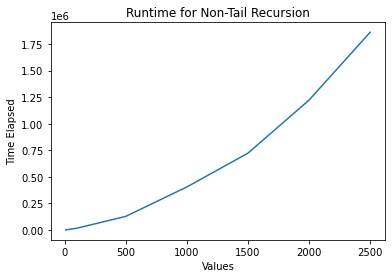

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(values_non, times_elapsed_non)
plt.xlabel("Values")
plt.ylabel("Time Elapsed")
plt.title("Runtime for Non-Tail Recursion")
plt.show()
plt.savefig('nontailrec.png')

Running time for Tail-Recursion

In [32]:
#setting the x and y axis values
values_tail = list_values
times_elapsed_tail = average_values_tail

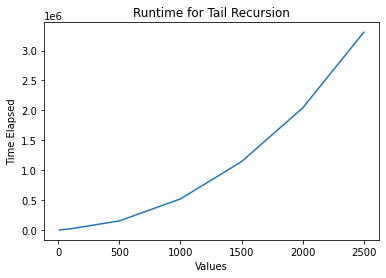

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(values_tail, times_elapsed_tail)
plt.xlabel("Values")
plt.ylabel("Time Elapsed")
plt.title("Runtime for Tail Recursion")
plt.show()
plt.savefig('tailrec.png')

Running time for Iterative Function

In [34]:
#setting the x and y axis values
values_iter = list_values
times_elapsed_iter = average_values_iter

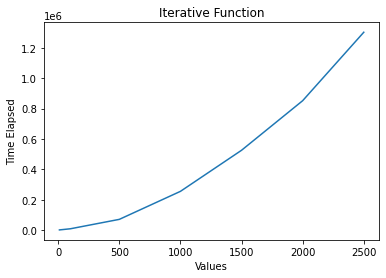

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(values_iter, times_elapsed_iter)
plt.xlabel("Values")
plt.ylabel("Time Elapsed")
plt.title("Iterative Function")
plt.show()
plt.savefig('iterec.png')

### Findings:

Even though there is no stack frame for the tail recursion, we expected a different runtime complexity. However, as we see from the result, each recursion of the tail function is stored in the second parameter "accumulator." At the end, tail recursion still has to run an _x_ amount of times (following the recursion principle) and so as illustrated with the graph above that the run time complexity is not that much different from a non tail recursion function. 

In this graph we see that each function has a time complexity of O(n) - linear run time complexity.

Though the same, the implementation is different. Recursion is a process that is always applied to it's own function. While iteration is applied to a set of instructions which is executed repeatedly. 

# Question 3 - Iterative and Recursion Binary Search

### Pseudocode for Iterative and Recursion Binary Search

Iterative Pseudocode:
* define binary_iter that takes an array, lowest index, highest index, value to find then
    * initiate a while loop where low is less than or equal to high then
        * let mid equal to (low + high) divded by 2
        * if the index is mid and the index of array is greater than the array element then
            * let high equal to mid - 1
        * else if the index is mid and index of array is less than the array element then
            * let low equal to mid + 1
        * else
            * let high equal to mid - 1

Recursive Pseudocode:

* define binary_recur that takes an array, lowest index, highest index, element to find
    * if high is greater than or equal to low index then
        * let mid equal to low and add (element - low) and divide by 2
        * if the index is equal to mid and the index of array is greater than element then
            * return by calling binary_recur(array, mid - 1, highest index, element to find)
        * else then
            * return by calling binary_recur(array, mid + 1, highest index, element to find)
    * else then
        * return -1
        

### Algorithm for Binary Search

<img style="float: left;" src="binary_iter.JPG">

<img style="float: left;" src="binary_rec.jpg">

### Python Code for Iterative and Recursive Binary Search

Function: Iterative Binary Search

In [36]:
def binary_iter(array, low, high, element):
    while low <= high:
        mid = low + (high - low) // 2
        
        if array[mid] == element:
            return mid
        
        elif array[mid] < element:
            low = mid + 1
            
        else:
            high = mid - 1
            
    return - 1

# high = len(average_values_nontail)-1
# to_find = 10204.4
# iter_index = binary_iter(average_values_nontail, low, high, to_find)
# print(iter_index)

Function: Recursive Binary Search

In [37]:
def binary_rec(array, low, high, element):
    if high >= low: 
        mid = low + (high - low) // 2
  
        if array[mid] == element: 
            return mid 
          
        elif array[mid] > element: 
            return binary_rec(array, low, mid-1, element) 
  
        else: 
            return binary_rec(array, mid + 1, high, element) 
  
    else: 
        return -1

# low = 0
# high = 35
# to_find = 10204.4
# array_nontail = average_values_nontail
# iter_index = binary_rec(, low, high, to_find)
# print(iter_index)

#  Question 4 - Running Time for each Function
In this section, I will calculate the best and worse case running time for each binary search problem. 
<br><br>
**Methodology:**
<br>
* Define a function that calls the binary search functions above and calculates the running time of each value that calls it and returns an array.
* Loop through an array of arrays that calls a function and stores these run times into an array.
* Plot each run time; for best case and worst case scenarios.
* Best case: the element to find is len(array)//2.
* Worst case: the element to find is either array[0] or array[len(array)]. In this section I will use the first element of an array.

In the cell below, we take the module random.sample to product random integers and store it in a list within a given range. When conducting binary search the array is always sorted.

In [38]:
list1 = random.sample(range(10000), 10000)
list2 = random.sample(range(20000), 20000)
list3 = random.sample(range(40000), 40000)
list4 = random.sample(range(80000), 80000)
list5 = random.sample(range(160000), 160000)
list6 = random.sample(range(320000), 320000)
list7 = random.sample(range(640000), 640000)
list8 = random.sample(range(1280000), 1280000)
list9 = random.sample(range(2640000), 2640000)
list10 = random.sample(range(10240000), 10240000)
list11 = random.sample(range(20480000), 20480000)

list1.sort()
list2.sort()
list3.sort()
list4.sort()
list5.sort()
list6.sort()
list7.sort()
list8.sort()
list9.sort()
list10.sort()
list11.sort()

In [39]:
#Putting the arrays into a single array. We use arrays_tosearch to run it through the binary search functions
arrays_tosearch = [list1, list2, list3, list4, list5, list6, list7, list8, list9, list10, list11]

### Runtime for each function.
<br>**Methodology**
* initiate empty array [] .
* run a loop to run 100 times, to call the iterative binary search function (binary_iter()) and calculate the running time.
* store the running time in the array.
* function then returns the array.

The array returned will be used as the x-value to plot the graph.

* initiates empty array. 
* loops through the array of list arrays then
    * calls the runtime_binary_iter function and store return value in a variable.
    * calls a module to calculate the average (see average_runtime.py file attached with the zip file) and stored in a valuable.
    * add the average to the initialized array

Function: iterative binary search best case

In [40]:
#loop through each array, and run the search algorithm with these arrays by calling a function
def runtime_binary_iter(array):
    array_2 = []
    for i in range(100):
        start = pns()
        binary_iter(array, 0, len(array), len(array)//2)
        end = pns()
        runtime = end - start
        array_2 += [runtime]
    return array_2

In [41]:
runtime_search_array_iter = []
for array in arrays_tosearch:
    runtime = runtime_binary_iter(array)
    av = calculate_average(runtime)
    runtime_search_array_iter += [av]

print(runtime_search_array_iter)

[573.0, 521.0, 524.0, 526.0, 531.0, 516.0, 526.0, 522.0, 524.0, 519.0, 529.0]


Function: recursive binary search best case

In [42]:
#loop through each array, and run the search algorithm with these arrays by calling a function
def runtime_binary_rec(array):
    array1 = []
    for i in range(100):
        start = pns()
        binary_iter(array, 0, len(array), len(array)//2)
        end = pns()
        runtime = end - start
        array1 += [runtime]
    return array1

In [43]:
runtime_search_array_rec = []
for array in arrays_tosearch:
    runtime = runtime_binary_rec(array)
    av = calculate_average(runtime)
    runtime_search_array_rec += [av]
    
print(runtime_search_array_rec)

[546.0, 523.0, 527.0, 526.0, 526.0, 545.0, 523.0, 519.0, 528.0, 517.0, 518.0]


Function: iterative binary search worst case

In [44]:
#loop through each array, and run the search algorithm with these arrays by calling a function
def iterB_worst(array):
    array_runtime = []
    for i in range(100):
        start = pns()
        binary_iter(array, 0, len(array), 0)
        end = pns()
        runtime = end - start
        array_runtime += [runtime]
    return array_runtime

In [45]:
iterB_worstcase = []
for array in arrays_tosearch:
    runtime = iterB_worst(array)
    av = calculate_average(runtime)
    iterB_worstcase += [av]
    
print(iterB_worstcase)

[3293.0, 3595.0, 3798.0, 4049.0, 4291.0, 4591.0, 4835.0, 5151.0, 5339.0, 6000.0, 6037.0]


Function: recursive binary search worst case

In [46]:
#loop through each array, and run the search algorithm with these arrays by calling a function
def recB_worst(array):
    array_runtime = []
    for i in range(100):
        start = pns()
        binary_rec(array, 0, len(array), 0)
        end = pns()
        runtime = end - start
        array_runtime += [runtime]
    return array_runtime

In [47]:
recB_worstcase = []
for array in arrays_tosearch:
    runtime = iterB_worst(array)
    av = calculate_average(runtime)
    recB_worstcase += [av]
    
print(recB_worstcase)

[3790.0, 3549.0, 3798.0, 4101.0, 4320.0, 4606.0, 4840.0, 5104.0, 5323.0, 5864.0, 6090.0]


### Findings:

**Running the functions:**
<br>
There is no loop when running the recursive binary search function and so instead of passing the value to the next iteration it is passed to the calling of the function. Each function called or looped through compresses the lists into half each iteration/call. The lists created were unsorted at first when first made and it needed to be sorted and so .sort() was used. The cell ran for a longer period of time. 
<br><br>
The functions that called the binary search functions (such as recB_worst()) had a loop to calculate the average runtime of 100 binary search function calls. These functions took one parameter which is a value from list arrays and it is called in order. 
<br><br>
A while loop was used in the iterative binary search function and only returns two values: the element and an error message -1. 

**Running the functions:**
<br>
Implementing runtime for each function: there is no loop running the function. Instead of passing the value to the next iteration it is passed to calling the function itself. Each function called or looped through compresses the lists into half each iteration or call. The lists created were unsorted at first when first made and it needed to be sorted and so .sort() was used. The cell ran for a longer period of time. The functions that called the binary search functions (such as recB_worst()) had a loop to calculate the average runtime of 100 binary search function calls. These functions took one parameter which is a value from list arrays and it is called in order.
<br><br>
_Recursive Binary Search (binary_rec())_: The recursive binary search function ran the intended purpose. The parameters that were passed were used: array, lowest index element of the array, highest index element of the array and the element to search for. Calculating the running time for the best case,  we expected a time complexity of O(1). To do this, the element is the value that sits in the middle of the array (len(array)//2). When this is run 100 times for each list, the average time is calculated, plotted, the expected values to be returned should be runtimes that fall close to each other. This was achieved as the array returned for example: [487.0, 467.0, 471.0, 470.0, 471.0, 471.0, 475.0, 481.0, 472.0, 471.0, 468.0]
<br><br>
For the worst case, the element to search for was then the first element of the array. This was chosen because the search starts in the middle of the array and in order to meet the worst case scenario the element should be the last time the array is able to divide itself into half. When this is run 100 times for each list, the average time calculated, plotted, the expected values to be returned should be a sharp increase between the range of each value but the last few values should be closer. This is a time complexity of O(log(n)) This was achieved as the array returned for one of the functions ran is: [3588.0, 3839.0, 4125.0, 4351.0, 4652.0, 4926.0, 5205.0, 5502.0, 6103.0, 6349.0, 6565.0]
<br><br>
_Iterative Binary Search (binary_iter())_: The iterative binary search function ran the intended purpose. The parameters that were passed: array, lowest index of the array, highest index element of the array and the element to search for. Calculating the running time for the best case, we also expected a time complexity of O(1). The element is the value that sits in the middle of the array (len(array)//2). When run 100 times for wach list, we again expect an array of runtimes that have a small constrast between each other. We get the expected results: [504.0, 474.0, 470.0, 466.0, 483.0, 469.0, 607.0, 469.0, 463.0, 466.0, 463.0]
<br><br>
For the worst case, the element chosen to search for is the first element of the array. This was chosen because the search starts in the middle of the array. When this is run 100 times for each list, the average time calculated, plotted the expected values that should return should have a big increase for the first number of elements of the array and slowly the range between the last number of values should be smaller. This was achieved: [3314.0, 3522.0, 3786.0, 4016.0, 4277.0, 4535.0, 4798.0, 4949.0, 5175.0, 5690.0, 5880.0]

### Visualizing the running time of each binary search function

Iterative Binary Search Function for Best Case

In [48]:
values_iter_binary = [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1280000, 2640000, 10240000, 20480000]
times_elapsed_binary_iter = runtime_search_array_iter

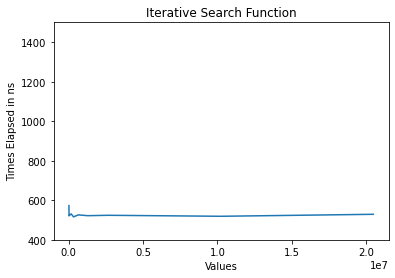

<Figure size 432x288 with 0 Axes>

In [75]:
plt.ylim(400,1500)
plt.plot(values_iter_binary, times_elapsed_binary_iter)
plt.xlabel("Values")
plt.ylabel("Times Elapsed in ns")
plt.title("Iterative Search Function")
plt.show()
plt.savefig('iterbinary.png')

Recursive Binary Search Function for Best Case


In [50]:
values_rec_binary = [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1280000, 2640000, 10240000, 20480000]
times_elapsed_binary_rec = runtime_search_array_rec

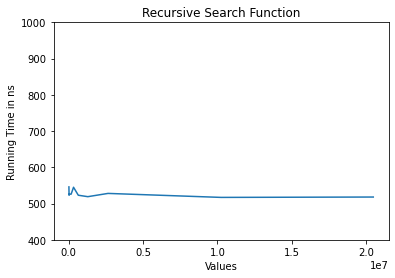

<Figure size 432x288 with 0 Axes>

In [76]:
plt.ylim(400,1000)
plt.plot(values_rec_binary, times_elapsed_binary_rec)
plt.xlabel("Values")
plt.ylabel("Running Time in ns")
plt.title("Recursive Search Function")
plt.show()
plt.savefig('recbinary.png')

Iterative Binary Search Function for Worst Case

In [52]:
values_iter_binary = [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1280000, 2640000, 10240000, 20480000]
times_elapsed_worst_iter = iterB_worstcase

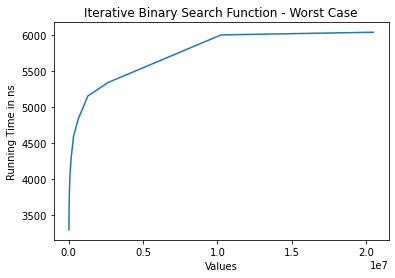

<Figure size 432x288 with 0 Axes>

In [77]:
plt.plot(values_iter_binary, times_elapsed_worst_iter)
plt.xlabel("Values")
plt.ylabel("Running Time in ns")
plt.title("Iterative Binary Search Function - Worst Case")
plt.show()
plt.savefig('iterworstbinary.png')

Recursive Binary Search for Worst Case

In [54]:
values_iter_binary = [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1280000, 2640000, 10240000, 20480000]
times_elapsed_worst_rec = recB_worstcase

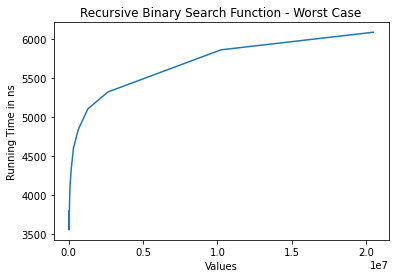

<Figure size 432x288 with 0 Axes>

In [78]:
plt.plot(values_rec_binary, times_elapsed_worst_rec)
plt.xlabel("Values")
plt.ylabel("Running Time in ns")
plt.title("Recursive Binary Search Function - Worst Case")
plt.show()
plt.savefig('recbinaryworst.png')

### Findings:

The graph demonstrates the runtimes for the worst cases and best cases for each binary search functions. 
<br><br>
_Best Case_: The graph for binary and iterative binary search functions demonstrates a straight line. However, the recrusive graph has a slight spike. However as the rest of the lists are run, it is mostly constant. This is the expected result as when the function is run, the result is returned on the first call/iteration because the element input is right in the middle. O(1) then demonstrates a straight line on a graph. 
<br><br>
_Worst Case_: The graph for the binary search functions demonstraights a large spike in the initial lists that were ran and eventually we see that the line starts to become constant. This is the expected result, because we calculated that the time complexity for the worst case for both functions to be O(log(n)). 

# Question 5 - Curve Fitting Algorithms
In this section, I will plot curve fitting algorithms using curve_fit() from scipy.optimize. 

Methodology:
A graph will be implmented by using the inputs and outputs from the collected values above for recursion and binary search functions. 
1. A mapping function will be defined. 
2. We search for parameters that will result in minimum error and plot it in a graph by using this mapping function.
3. Errors will be taken by using the observations from the domain and passing the inputs to our candidate mapping function. 
4. These will be compared to the calculated output to the observed output.


To determine the mapping function, we must use the observed time complexity. We then use the observed time complexities to determine the equation of the running time to fit to the mapping function.
<br><br>
For this assignment, the running time for recursion and binary search were implemented. Recursive functions demonstrated a running time of O(n). Binary search demonstrated a O(1) for the best case running time, while it demonstrated a O(log(n)) for the worst case scenario.

**a) Recursive (Non-tail and Tail) & Iterative**

In [56]:
#defining a linear running time form
def linear_objective(x, a, b):
    return a * x + b

Plotting linear regression for non tail recursive function

In [57]:
#curve fit
pop_nontail, _ = curve_fit(linear_objective, values_non, times_elapsed_non)
# summarize the parameter values
a, b = pop_nontail

In [58]:
# define a sequence of inputs between the smallest and largest known inputs
x_line_nontail = arange(min(values_non), max(values_non), 1)

# calculate the output for the range
y_line_nontail = linear_objective(x_line_nontail, a, b)

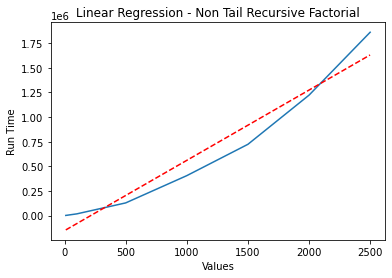

<Figure size 432x288 with 0 Axes>

In [79]:
#create a plot again
pyplot.plot(values_non, times_elapsed_non)

# create a line plot for the mapping function
pyplot.plot(x_line_nontail, y_line_nontail, '--', color='red')
pyplot.xlabel('Values')
pyplot.ylabel('Run Time')
pyplot.title('Linear Regression - Non Tail Recursive Factorial')
pyplot.show()
pyplot.savefig('linearnontail.png')

Plotting linear regression for tail recursive function

In [60]:
pop_tail, _ = curve_fit(linear_objective, values_tail, times_elapsed_tail)
# summarize the parameter values
a, b = pop_tail

In [61]:
x_line_tail = arange(min(values_non), max(values_non), 1)

# calculate the output for the range
y_line_tail = linear_objective(x_line_tail, a, b)

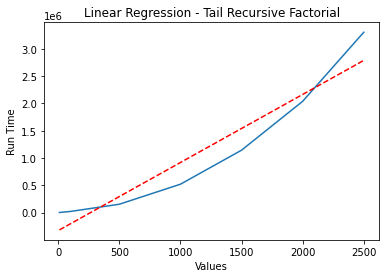

<Figure size 432x288 with 0 Axes>

In [80]:
#create a plot
pyplot.plot(values_tail, times_elapsed_tail)

# create a line plot for the mapping function
pyplot.plot(x_line_tail, y_line_tail, '--', color='red')
pyplot.xlabel('Values')
pyplot.ylabel('Run Time')
pyplot.title('Linear Regression - Tail Recursive Factorial')
pyplot.show()
pyplot.savefig('lineartail.png')

Plotting linear regression for iterative factorial function

In [63]:
pop_iter, _ = curve_fit(linear_objective, values_iter, times_elapsed_iter)
# summarize the parameter values
a, b = pop_iter

In [64]:
x_line_iter = arange(min(values_iter), max(values_iter), 1)

# calculate the output for the range
y_line_iter = linear_objective(x_line_iter, a, b)

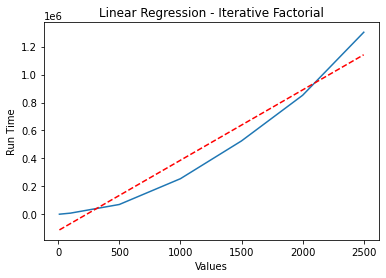

<Figure size 432x288 with 0 Axes>

In [81]:
#create a plot
pyplot.plot(values_iter, times_elapsed_iter)

# create a line plot for the mapping function
pyplot.plot(x_line_iter, y_line_iter, '--', color='red')
pyplot.xlabel('Values')
pyplot.ylabel('Run Time')
pyplot.title('Linear Regression - Iterative Factorial')
pyplot.show()
pyplot.savefig('lineariter.png')

**b) Binary Search - Worst Case Running Time**
- O(log(n)) is logarithmic. The equation that will be used in this equation is:
    - a + b * log(x) where x is an array that contains values that are evenly spaced between the minimum and maximum values.
    - it will be put into a function _log_objective_.

In [66]:
# the objective function is defined by log(x).
def log_objective(x, a, b):
    return a + b * log(x)

Plotting logarithmic regression for worst case recursive binary search

In [67]:
#arranging an evenly spaced value array between the maximum and minimum values.
x_line_worst_recbin = arange(min(values_iter_binary), max(values_iter_binary), 1)

In [68]:
#fit the equation into a curve+_
popt_worst_recbin, _ = curve_fit(log_objective, values_iter_binary, times_elapsed_worst_rec)
# summarize the parameter values
worst_a_recbin, worst_b_recbin = popt_worst_recbin

In [69]:
y_line_worst_recbin = log_objective(x_line_worst_recbin, worst_a_recbin, worst_b_recbin)

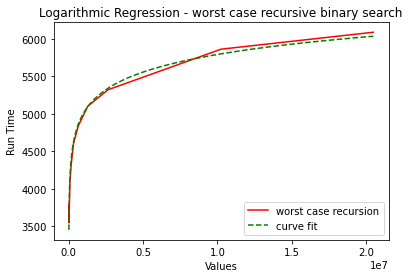

<Figure size 432x288 with 0 Axes>

In [82]:
pyplot.plot(values_iter_binary, times_elapsed_worst_rec, color='red')
pyplot.plot(x_line_worst_recbin, y_line_worst_recbin, '--', color='green')
pyplot.legend(['worst case recursion', 'curve fit'])
pyplot.xlabel('Values')
pyplot.ylabel('Run Time')
pyplot.title('Logarithmic Regression - worst case recursive binary search')
pyplot.show()
pyplot.savefig('logworstrec.png')

Plotting logarithmic regression for worst case iterative binary search

In [71]:
#arranging an evenly spaced value array between the maximum and minimum values.
x_line_worst_iterbin = arange(min(values_iter_binary), max(values_iter_binary), 1)

In [72]:
#fit the equation into a curve+_
popt_worst_iterbin, _ = curve_fit(log_objective, values_iter_binary, times_elapsed_worst_iter)
# summarize the parameter values
worst_a_iterbin, worst_b_iterbin = popt_worst_iterbin

In [73]:
y_line_worst_iterbin = log_objective(x_line_worst_iterbin, worst_a_iterbin, worst_b_iterbin)

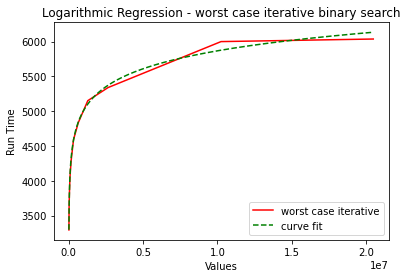

<Figure size 432x288 with 0 Axes>

In [83]:
pyplot.plot(values_iter_binary, times_elapsed_worst_iter, color='red')
pyplot.plot(x_line_worst_recbin, y_line_worst_iterbin, '--', color='green')
pyplot.legend(['worst case iterative', 'curve fit'])
pyplot.xlabel('Values')
pyplot.ylabel('Run Time')
pyplot.title('Logarithmic Regression - worst case iterative binary search')
pyplot.show()
pyplot.savefig('logworstiter.png')

### Conclusion

To conclude, we see that using curve fitting algorithms gives us a best visualisation of each function (not including the best case binary runtimes).
<br><br>
The recursive functions did not entirely behave accurately as we see a slight curve in the linear regression. However, the growth still represents a linear one and I would conclude that it is the expected result. This demonstrates a relationship between the number of values to runtime, where as the value increases the higher the program takes to run. 
<br><br> 
The binary search functions also demonstrates a logarithmic regression. The code implemented is based off the run time O(log(n)). The actual values compared to the predicted fit is almost accurate. The rate of increase is sharp in the predicted curve, the same as the actual binary search functions and eventually it begins to become constant. We see that there is a realtionship, where the smaller values has a sharp increase in terms of how long the functions run with smaller lists and as the lists get bigger in size, the time it takes to run the binary search functions start to lessen and steadies.

The algorithms illustrated gave a clear depiction of the structure of the code. For each algorithm there was a desired input and output based on the type of process that the question was asking to implement (recursion, linear/binary search). Having a clear structure (writing the algorithm) made the process of implementing it in code much easier. Though, there were difficulties trying to figure out how to run an average of the runtimes of each function and the solution that ended up being made was to create a seperate module (please see attached .py file) that calls it in a for loop for every list/value of an array and returns an average number. 